In [38]:
def f(x):
    return x**2

numbers = [1,2,3,4]

list(map(f, numbers))

# La dura vida del CSV 📜

In [1]:
# bad CSV (",)

file_name = "breweries_us.csv"
lines = (line for line in open(file_name))
list_line = (s.rstrip().split(",") for s in lines)
cols = next(list_line)
brew_dicts = (dict(zip(cols, data)) for data in list_line)


tt = (
    d["website"]
    for d in brew_dicts
    if "plaza" in d["address"].strip().lower()
)

#for i in (bd["address"] for bd in brew_dicts if "plaza" in bd["address"].strip().lower()):
list(tt)

[' Ste. 1115 ',
 ' Omaha',
 ' Englewood',
 ' Englewood',
 ' Key West',
 ' New Albany',
 ' Braintree',
 ' Grand Rapids',
 ' Minneapolis',
 ' Sparta',
 ' Lake Grove',
 ' Pearl River',
 ' New York',
 ' Fort Worth',
 ' Falls Church',
 ' Sterling',
 ' Guaynabo ']

In [62]:
import pandas as pd
import json
import numpy as np

In [41]:
brew = pd.read_csv("breweries_us.csv")

In [59]:
brew

,brewery_name,type,address,website,state,state_breweries
0,Valley Brewing Co.,Brewpub,"PO Box 4653, Stockton, California, 95204",http://www.valleybrew.com/,california,284
1,Valley Brewing Co.,Brewpub,"157 Adams St., Stockton, California, 95204",http://www.valleybrew.com/,california,284
2,Valley Brewing Co,Microbrewery,"1950 W Freemont, Stockton, California, 95203",http://www.valleybrew.com/,california,284
3,Ukiah Brewing Company,Brewpub,"102 S. State St., Ukiah, California, 95482",http://www.ukiahbrewingco.com/,california,284
4,Tustin Brewing Co.,Brewpub,"13011 Newport Ave. #100, Tustin, California, 9...",http://www.tustinbrewery.com/,california,284
...,...,...,...,...,...,...
2402,Capitol City Brewing Company (Capitol Hill),Brewpub,"2 Massachusetts Ave., Washington, DC, Washingt...",http://www.capcitybrew.com/,washington-dc,9
2403,Capitol City Brewing Company,Brewpub,"1100 New York Ave. NW, Washington, DC, Washing...",http://www.capcitybrew.com/,washington-dc,9
2404,Old Harbor Brewery,Brewpub,"Gen del Valle 1021 Urb Delicias, San Juan, PR,...",http://oldharborbrewery.com/,puerto-rico,3
2405,Isla Verde Brewing Co.,Microbrewery,"Condiminum Torrimar Plaza # 14B, Guaynabo , PR...",...,puerto-rico,3


In [69]:
brew["numero_aleatorio"] = "jajajaja"

brew.query("state_breweries > 150")

In [74]:
brew[
    (brew["address"].str.lower().str.contains("plaza"))
    & (brew["website"].str.lower().str.contains("com"))
    & (brew["state_breweries"] > 100)
]

,brewery_name,type,address,website,state,state_breweries,numero_aleatorio
584,C.B. and Potts/Big Horn Brewery- Englewood,Brewpub,"6575 Greenwood Plaza Blvd., Englewood, Colorad...",http://www.cbpotts.com/,colorado,182,jajajaja
599,Big Horn Brewery,Brewpub,"6575 Greenwood Plaza Blvd., Englewood, Colorad...",http://www.theram.com/,colorado,182,jajajaja
1442,John Harvards Brew House - Lake Grove,Brewpub,"2093 Smith Haven Plaza, Lake Grove, New York, ...",http://www.johnharvards.com/,new-york,107,jajajaja
1464,Defiant Brewing Co.,Microbrewery,"6 E Dexter Plaza, Pearl River, New York, 10965",http://www.defiantbrewing.com/,new-york,107,jajajaja


In [87]:
brew.loc[1464]

brewery_name                                   Defiant Brewing Co.
type                                                  Microbrewery
address             6 E Dexter Plaza, Pearl River, New York, 10965
website                             http://www.defiantbrewing.com/
state                                                     new-york
state_breweries                                                107
numero_aleatorio                                          jajajaja
Name: 1464, dtype: object

In [89]:
brew.loc[brew["state_breweries"] > 100, "state"]

0       california
1       california
2       california
3       california
4       california
           ...    
2308    washington
2309    washington
2310    washington
2311    washington
2312    washington
Name: state, Length: 987, dtype: object

In [170]:
json.loads(brew.to_json(orient="index"))

{'0': {'brewery_name': 'Valley Brewing Co.',
  'type': 'Brewpub',
  'address': 'PO Box 4653, Stockton, California, 95204',
  'website': 'http://www.valleybrew.com/',
  'state': 'california',
  'state_breweries': 284},
 '1': {'brewery_name': 'Valley Brewing Co.',
  'type': 'Brewpub',
  'address': '157 Adams St., Stockton, California, 95204',
  'website': 'http://www.valleybrew.com/',
  'state': 'california',
  'state_breweries': 284},
 '2': {'brewery_name': 'Valley Brewing Co',
  'type': 'Microbrewery',
  'address': '1950 W Freemont, Stockton, California, 95203',
  'website': 'http://www.valleybrew.com/',
  'state': 'california',
  'state_breweries': 284},
 '3': {'brewery_name': 'Ukiah Brewing Company',
  'type': 'Brewpub',
  'address': '102 S. State St., Ukiah, California, 95482',
  'website': 'http://www.ukiahbrewingco.com/',
  'state': 'california',
  'state_breweries': 284},
 '4': {'brewery_name': 'Tustin Brewing Co.',
  'type': 'Brewpub',
  'address': '13011 Newport Ave. #100, Tust

In [164]:
# so example: https://www.google.com/search?client=firefox-b-d&q=pandas+string+column+in
brew[brew["address"].str.lower().str.contains("plaza")]

,brewery_name,type,address,website,state,state_breweries
59,River City Brewing,Brewpub,"545 Downtown Plaza, Ste. 1115 , Sacramento, Ca...",http://www.rivercitybrewing.net/,california,284
362,Upstream Brewing Co. (#2),Brewpub,"17070 Wright Plaza, Omaha, Nebraska, 68130",http://www.upstreambrewing.com/,nebraska,15
584,C.B. and Potts/Big Horn Brewery- Englewood,Brewpub,"6575 Greenwood Plaza Blvd., Englewood, Colorad...",http://www.cbpotts.com/,colorado,182
599,Big Horn Brewery,Brewpub,"6575 Greenwood Plaza Blvd., Englewood, Colorad...",http://www.theram.com/,colorado,182
663,Key West Overseas Brewery,Microbrewery,"1107 Key Plaza, Key West, Florida, 33040",...,florida,99
895,New Albanian Brewing Co,Brewpub,"3312 Plaza Dr., New Albany, Indiana, 47150",http://www.richos.com/,indiana,31
1065,Rock Bottom Brewery - Braintree,Brewpub-Closed,"South Shore Plaza, Braintree, Massachusetts, 2184",http://www.rockbottom.com/,massachusetts,71
1177,Hideout Brewing Co,Microbrewery,"3113 Plaza Drive NE, Grand Rapids, Michigan, 4...",http://www.hideoutbrewing.com/,michigan,94
1232,Rock Bottom Brewery (Minneapolis),Brewpub,"800 La Salle Plaza , Minneapolis, Minnesota, 5...",http://www.rockbottom.com/,minnesota,40
1323,Kroghs Restaurant & Brewpub,Brewpub,"23 White Deer Plaza, Sparta, New Jersey, 7871",http://www.kroghs.com/,new-jersey,41


Otros:
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.json.json_normalize.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_json.html

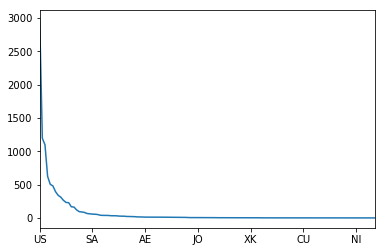

In [11]:
df = pd.read_csv("all_annotated.tsv", sep="\t")
df["Country"].value_counts().plot();

In [4]:
url_base = 'https://raw.githubusercontent.com/cmrivers/ebola/master/guinea_data/'

In [9]:
pd.read_csv(url_base + "2014-09-02.csv").columns

Index(['Date', 'Description', 'Totals', 'Conakry', 'Gueckedou', 'Macenta',
       'Dabola', 'Kissidougou', 'Dinguiraye', 'Telimele', 'Boffa', 'Kouroussa',
       'Siguiri', 'Pita', 'Mzerekore', 'Yomou', 'Dubreka', 'Forecariah',
       'Kerouane', 'Coyah', 'Dalaba', 'Beyla', 'Kindia', 'Lola'],
      dtype='object')

In [25]:
import pandas as pd
mails = pd.read_csv('https://query.data.world/s/xa5ple7jju4rzs5zx6zpbv2gklml7r', index_col=0)

In [26]:
mails

,first_name,last_name,email,gender,street_number
id,,,,,
1,Von,Kardos,vkardos0@google.it,Male,62785
2,Ely,Harsant,eharsant1@dmoz.org,Male,8862
3,Hermy,Agiolfinger,hagiolfinger2@berkeley.edu,Male,54
4,Nappie,Craighead,ncraighead3@noaa.gov,Male,89
5,Rodrigo,Tower,rtower4@mlb.com,Male,52305
...,...,...,...,...,...
996,Gareth,Simnel,gsimnelrn@ow.ly,Male,6
997,Jerrine,Hurnell,jhurnellro@dailymail.co.uk,Female,73
998,Maurise,Habberjam,mhabberjamrp@sohu.com,Male,0


In [273]:
import pandas as pd
airport = pd.read_csv('https://query.data.world/s/y5tgknegiinkp55b5s2kruvmmvnu62', parse_dates=["Month"])

In [124]:
airport

,Month,Domestic Enplaned Passengers: Revenue,Domestic Deplaned Passengers: Revenue,International Enplaned Passengers: Revenue,International Deplaned Passengers: Revenue,Domestic Enplaned Passengers: Non-Revenue,Domestic Deplaned Passengers: Non-Revenue,International Enplaned Passengers: Non-Revenue,International Deplaned Passengers: Non-Revenue,International Enplaned Pre-Cleared Passengers: Revenue,...,Domestic Enplaned Belly Freight,Domestic Deplaned Belly Freight,International Enplaned Belly Freight,International Deplaned Belly Freight,South Terminal-Intl Enplaned Belly Freight,South Terminal-Intl Deplaned Belly Freight,Belly Freight Totals,Cargo Totals (Cargo + Mail + Belly Freight),Landing Totals,Weight Totals
0,2017-11-01,577478.0,576322.0,11009.0,10710.0,12821.0,12387.0,107.0,70.0,1675.0,...,298757.0,478798.0,535071.0,845513.0,0.0,0.0,2158139.0,15500991.0,5289,718179948
1,2017-10-01,594146.0,599364.0,8537.0,8849.0,13524.0,12999.0,88.0,84.0,1867.0,...,331870.0,525235.0,466213.0,796697.0,0.0,0.0,2120015.0,17736790.0,5448,743973610
2,2017-09-01,517266.0,523015.0,8722.0,8680.0,12327.0,11894.0,54.0,62.0,1713.0,...,290805.0,496065.0,230364.0,729001.0,0.0,0.0,1746235.0,17258726.0,5046,679381339
3,2017-08-01,547893.0,579960.0,11442.0,13172.0,14361.0,13566.0,139.0,135.0,1572.0,...,312689.0,539874.0,215184.0,776983.0,0.0,0.0,1844730.0,17004930.0,5490,741110019
4,2017-07-01,603794.0,601796.0,17506.0,18590.0,16784.0,15736.0,145.0,109.0,1731.0,...,283556.0,488524.0,340369.0,756384.0,0.0,0.0,1868833.0,14609172.0,5698,763088836
5,2017-06-01,611382.0,570779.0,16761.0,15413.0,15288.0,14762.0,132.0,95.0,1832.0,...,350238.0,551406.0,244790.0,571912.0,0.0,0.0,1718346.0,16197792.0,5603,752628599
6,2017-05-01,579820.0,552346.0,14919.0,13959.0,14193.0,13074.0,94.0,61.0,1769.0,...,272998.0,562633.0,141385.0,754657.0,0.0,0.0,1731673.0,15255708.0,5529,736484083
7,2017-04-01,535065.0,522207.0,11635.0,11118.0,13578.0,13027.0,84.0,98.0,1862.0,...,328731.0,611195.0,194817.0,572009.0,0.0,0.0,1706752.0,16562736.0,5179,689402051
8,2017-03-01,547253.0,556890.0,12057.0,11759.0,13062.0,12730.0,110.0,62.0,1384.0,...,265588.0,530646.0,248653.0,793696.0,NaN,NaN,1838563.0,16197427.0,5307,685661659
9,2017-02-01,421805.0,422699.0,8487.0,8517.0,10423.0,10239.0,69.0,81.0,1384.0,...,194125.0,423275.0,299684.0,906184.0,NaN,NaN,1823268.0,13540149.0,4357,552711639


In [126]:
airport["Month"].dt.year

0    2017
1    2017
2    2017
3    2017
4    2017
Name: Month, dtype: int64

In [137]:
airport.drop(columns=["año", "Domestic Enplaned Passengers: Revenue"], inplace=True)

In [139]:
airport["año"] = airport["Month"].dt.year
airport["mes"] = airport["Month"].dt.month
airport["peso_por_landing"] = airport["Weight Totals"] / airport["Landing Totals"]

In [ ]:
airport_reducido =   # solo las columnas año, mes, peso_por_landing

In [ ]:
json.dumps()

In [173]:
import json

{'0': {'Month': 1509494400000,
  'Domestic Deplaned Passengers: Revenue': 576322.0,
  'International Enplaned Passengers: Revenue': 11009.0,
  'International Deplaned Passengers: Revenue': 10710.0,
  'Domestic Enplaned Passengers: Non-Revenue': 12821.0,
  'Domestic Deplaned Passengers: Non-Revenue': 12387.0,
  'International Enplaned Passengers: Non-Revenue': 107.0,
  'International Deplaned Passengers: Non-Revenue': 70.0,
  'International Enplaned Pre-Cleared Passengers: Revenue': 1675.0,
  'International Deplaned Pre-Cleared Passengers: Revenue': 1886.0,
  'International Enplaned Pre-Cleared Passengers: Non-Revenue': 29.0,
  'International Deplaned Pre-Cleared Passengers: Non-Revenue': 28.0,
  'South Terminal Domestic Enplaned Revenue': 1327.0,
  'South Terminal Domestic Deplaned Revenue': 1227.0,
  'South Terminal Domestic Enplaned Non-Revenue': 2.0,
  'South Terminal Domestic Deplaned Non-Revenue': 3.0,
  'Total Passengers': 1207081.0,
  'Air Carrier Operations': 10335.0,
  'Commut

In [190]:
with open("dataframe.json", "w") as f:
    json.dump(airport.to_json(orient="index"), f)
    # airport.to_json(orient="index")

In [156]:
json.loads(airport.to_json(orient="index"))["0"]["Month"]

1509494400000

In [147]:
airport["Domestic Enplaned Passengers: Non-Revenue"].mean()

11284.584905660377

In [ ]:
nuevo_csv = airport[...query...]

In [ ]:
nuevo_csv   # <-- guardar como csv en el disco duro

crear una query para seleccionar la columna`mes`, donde `Domestic Deplaned Belly Freight` > $516322.0$
y`Domestic Enplaned Passengers: Non-Revenue` sea mayor que la media de esa columna

In [168]:
new_df = airport.loc[
    (airport["Domestic Deplaned Belly Freight"] > 516322.0)
    & (
        airport["Domestic Enplaned Passengers: Non-Revenue"]
        > airport["Domestic Enplaned Passengers: Non-Revenue"].mean()
    ),
    "mes",
]

In [100]:
airport.set_index("Month", inplace=True)

In [105]:
airport.reset_index(inplace=True)

# Mail Sender (LIVE 😰)

* Mail generator
* Puesto generator
* Template
* Decorator: add df row with data

Crear una función, que genere direcciones aleatorias de e-mail

# Problema: generar dirección de email

**Divisiones:**

* Nombre
  *  * Lista de posibles nombres 
  * Lista de fechas
  * Lista de caracteres (letras, signos...)
 
* Generar
  * random

* Dominio
  * lista de dominios aleatorios
  * raiz del dominio:
    * lista/tuple/set de raizes

* @



In [74]:
from random import choice, randint
from string import ascii_lowercase as letters

randint(0, 99)

username_list = []
username_string = ""

for _ in range(3, 16):
    username_string += (choice(letters))
    username_list.append(choice(letters))

username_string

"".join(username_list)

[i for i in range(0, randint(3, 16))]

def un_generator():
    yield "".join([choice(letters) for _ in range(0, randint(3, 16))])

next(un_generator())

# "".join(list(zip(un_generator(), "@"))[0])

In [274]:
def mail_generator(minimo=3, maximo=16):
    dominios = ["hotmail", "gmail", "yahoo", "externos.itnow", "outlook"]
    raices = [".es", ".com", ".pl", ".xyz"]

    # nombre_usuario = ""
    nombre_usuario = "".join(
        [choice(letters) for _ in range(0, randint(minimo, maximo))]
    )
    # for _ in range(minimo, maximo):
    # nombre_usuario += choice(letters)

    dominio = choice(dominios)
    raiz = choice(raices)

    direccion_final = f"{nombre_usuario}@{dominio}{raiz}"

    return direccion_final

In [275]:
mail_generator(minimo=1, maximo=2)

'rn@yahoo.es'

In [288]:
def puesto_de_trabajo_random():
    
    puestos = ["gerente", "sysadmin", "frontend", "atencion usuario", "contable", "backend", "devops"]
    
    return choice(puestos)

In [289]:
airport["mail"] = [mail_generator() for _ in range(len(airport))]

In [290]:
airport["puesto"] = [puesto_de_trabajo_random() for _ in range(len(airport))]

Ejercicio: Conseguir el mail para 2 puestos de trabajo que queráis con una query.

Aseguraos de que se pueda conseguir el mail/nombre independientemente de que el string tena mayúsculas o no

> pista: `.str.lower()`

In [327]:
airport.loc[
    (airport["puesto"].str.lower() == "devops")
    | (airport["puesto"].str.lower() == "sysadmin"),
    "mail",
]

0                  ikmjqvdzbzh@gmail.xyz
1             ndohkilydkwrtci@outlook.es
4                  xbpzgotwdou@yahoo.xyz
9                      uiijxk@outlook.pl
16                       rroyzr@yahoo.es
17                      vppmc@hotmail.pl
28              nukruwvhkczpk@hotmail.es
31    usjitsocgaqwfxh@externos.itnow.com
34                gsr@externos.itnow.xyz
40                       zcckql@gmail.es
43     rzobzusiwdtzumf@externos.itnow.es
53                        jshx@gmail.xyz
Name: mail, dtype: object

In [332]:
airport["puesto"].str.lower().apply(lambda x: x in ["sysadmin", "devops"])

0      True
1      True
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17     True
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
30    False
31     True
32    False
33    False
34     True
35    False
36    False
37    False
38    False
39    False
40     True
41    False
42    False
43     True
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53     True
Name: puesto, dtype: bool

In [333]:
airport.loc[
    (airport["puesto"].str.lower().apply(lambda x: x in ["sysadmin", "devops"])), "mail"
]

0                  ikmjqvdzbzh@gmail.xyz
1             ndohkilydkwrtci@outlook.es
4                  xbpzgotwdou@yahoo.xyz
9                      uiijxk@outlook.pl
16                       rroyzr@yahoo.es
17                      vppmc@hotmail.pl
28              nukruwvhkczpk@hotmail.es
31    usjitsocgaqwfxh@externos.itnow.com
34                gsr@externos.itnow.xyz
40                       zcckql@gmail.es
43     rzobzusiwdtzumf@externos.itnow.es
53                        jshx@gmail.xyz
Name: mail, dtype: object

In [340]:
def send_mail_to_puesto(puesto: str):
    mails = airport.loc[(airport["puesto"].str.lower() == puesto), "mail"]
    
    return mails.values

In [ ]:
for mail in send_mail_to_puesto("sysadmin"):
    send_mail()

In [339]:
send_mail_to_puest("sysadmin")

array(['ikmjqvdzbzh@gmail.xyz', 'uiijxk@outlook.pl', 'rroyzr@yahoo.es',
       'vppmc@hotmail.pl', 'usjitsocgaqwfxh@externos.itnow.com',
       'zcckql@gmail.es', 'rzobzusiwdtzumf@externos.itnow.es',
       'jshx@gmail.xyz'], dtype=object)

In [300]:
{k: "nuevo_nombre" for k in airport.columns}

{'Month': 'nuevo_nombre',
 'Domestic Enplaned Passengers: Revenue': 'nuevo_nombre',
 'Domestic Deplaned Passengers: Revenue': 'nuevo_nombre',
 'International Enplaned Passengers: Revenue': 'nuevo_nombre',
 'International Deplaned Passengers: Revenue': 'nuevo_nombre',
 'Domestic Enplaned Passengers: Non-Revenue': 'nuevo_nombre',
 'Domestic Deplaned Passengers: Non-Revenue': 'nuevo_nombre',
 'International Enplaned Passengers: Non-Revenue': 'nuevo_nombre',
 'International Deplaned Passengers: Non-Revenue': 'nuevo_nombre',
 'International Enplaned Pre-Cleared Passengers: Revenue': 'nuevo_nombre',
 'International Deplaned Pre-Cleared Passengers: Revenue': 'nuevo_nombre',
 'International Enplaned Pre-Cleared Passengers: Non-Revenue': 'nuevo_nombre',
 'International Deplaned Pre-Cleared Passengers: Non-Revenue': 'nuevo_nombre',
 'South Terminal Domestic Enplaned Revenue': 'nuevo_nombre',
 'South Terminal Domestic Deplaned Revenue': 'nuevo_nombre',
 'South Terminal Domestic Enplaned Non-Reven

In [352]:
airport_mitad1 = airport.loc[:, "Month":"International Deplaned Passengers: Non-Revenue"]

In [356]:
airport_mitad1.head(2)

,Month,Domestic Enplaned Passengers: Revenue,Domestic Deplaned Passengers: Revenue,International Enplaned Passengers: Revenue,International Deplaned Passengers: Revenue,Domestic Enplaned Passengers: Non-Revenue,Domestic Deplaned Passengers: Non-Revenue,International Enplaned Passengers: Non-Revenue,International Deplaned Passengers: Non-Revenue
0,2017-11-01,577478.0,576322.0,11009.0,10710.0,12821.0,12387.0,107.0,70.0
1,2017-10-01,594146.0,599364.0,8537.0,8849.0,13524.0,12999.0,88.0,84.0


In [353]:
airport_mitad2 = airport.loc[:, "International Deplaned Passengers: Non-Revenue":]

In [357]:
airport_mitad2.head(2)

,International Deplaned Passengers: Non-Revenue,International Enplaned Pre-Cleared Passengers: Revenue,International Deplaned Pre-Cleared Passengers: Revenue,International Enplaned Pre-Cleared Passengers: Non-Revenue,International Deplaned Pre-Cleared Passengers: Non-Revenue,South Terminal Domestic Enplaned Revenue,South Terminal Domestic Deplaned Revenue,South Terminal Domestic Enplaned Non-Revenue,South Terminal Domestic Deplaned Non-Revenue,Total Passengers,...,International Enplaned Belly Freight,International Deplaned Belly Freight,South Terminal-Intl Enplaned Belly Freight,South Terminal-Intl Deplaned Belly Freight,Belly Freight Totals,Cargo Totals (Cargo + Mail + Belly Freight),Landing Totals,Weight Totals,mail,puesto
0,70.0,1675.0,1886.0,29.0,28.0,1327.0,1227.0,2.0,3.0,1207081.0,...,535071.0,845513.0,0.0,0.0,2158139.0,15500991.0,5289,718179948,ikmjqvdzbzh@gmail.xyz,sysadmin
1,84.0,1867.0,1985.0,29.0,20.0,13699.0,13944.0,9.0,9.0,1269153.0,...,466213.0,796697.0,0.0,0.0,2120015.0,17736790.0,5448,743973610,ndohkilydkwrtci@outlook.es,devops


In [370]:
pd.read_csv("breweries_us.csv", na_values="Brewpub", usecols=[0, 2]).fillna("no esta!!!")

,brewery_name,address
0,Valley Brewing Co.,"PO Box 4653, Stockton, California, 95204"
1,Valley Brewing Co.,"157 Adams St., Stockton, California, 95204"
2,Valley Brewing Co,"1950 W Freemont, Stockton, California, 95203"
3,Ukiah Brewing Company,"102 S. State St., Ukiah, California, 95482"
4,Tustin Brewing Co.,"13011 Newport Ave. #100, Tustin, California, 9..."
...,...,...
2402,Capitol City Brewing Company (Capitol Hill),"2 Massachusetts Ave., Washington, DC, Washingt..."
2403,Capitol City Brewing Company,"1100 New York Ave. NW, Washington, DC, Washing..."
2404,Old Harbor Brewery,"Gen del Valle 1021 Urb Delicias, San Juan, PR,..."
2405,Isla Verde Brewing Co.,"Condiminum Torrimar Plaza # 14B, Guaynabo , PR..."


In [360]:
pd.concat([airport_mitad1, airport_mitad2]).fillna(0)

/Users/r/miniconda3/envs/course/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Air Carrier Operations,Belly Freight Totals,Cargo Totals,Cargo Totals (Cargo + Mail + Belly Freight),Commuter and Air Taxi Operations,Domestic Deplaned Belly Freight,Domestic Deplaned Cargo,Domestic Deplaned Mail,Domestic Deplaned Passengers: Non-Revenue,Domestic Deplaned Passengers: Revenue,...,South Terminal-Intl Deplaned Cargo,South Terminal-Intl Deplaned Mail,South Terminal-Intl Enplaned Belly Freight,South Terminal-Intl Enplaned Cargo,South Terminal-Intl Enplaned Mail,Total Operations,Total Passengers,Weight Totals,mail,puesto
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12387.0,576322.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12999.0,599364.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11894.0,523015.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13566.0,579960.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15736.0,601796.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,8754.0,703307.0,13161293.0,14225792.0,1454.0,451442.0,6385353.0,212386.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15059.0,878016.0,540694783.0,crnhtaqwprxh@gmail.es,contable
50,8167.0,637637.0,11626358.0,12520824.0,1405.0,407252.0,5579463.0,156831.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14419.0,785983.0,497853836.0,mun@yahoo.es,contable
51,8936.0,673867.0,12235554.0,13167719.0,1360.0,431463.0,6074324.0,158101.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15138.0,877727.0,541522098.0,jhbpsrsmnzvemwmi@externos.itnow.pl,atencion usuario
52,9053.0,658744.0,11001679.0,11923092.0,1268.0,395903.0,5416498.0,173379.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14784.0,922615.0,547957989.0,opoc@outlook.com,gerente


In [371]:
mails = pd.read_csv('https://query.data.world/s/xa5ple7jju4rzs5zx6zpbv2gklml7r', index_col=0)

In [292]:
airport["puesto"]

0             sysadmin
1               devops
2              backend
3     atencion usuario
4               devops
5              gerente
6             frontend
7             frontend
8             frontend
9             sysadmin
10            contable
11            frontend
12             backend
13    atencion usuario
14            frontend
15            frontend
16            sysadmin
17            sysadmin
18    atencion usuario
19             backend
20             backend
21            frontend
22    atencion usuario
23             gerente
24            contable
25            contable
26            frontend
27             backend
28              devops
29            contable
30    atencion usuario
31            sysadmin
32             backend
33             gerente
34              devops
35            frontend
36            frontend
37             gerente
38             gerente
39             gerente
40            sysadmin
41    atencion usuario
42            contable
43         

In [1]:
import sqlite3

In [2]:
import sqlite3
 
con = sqlite3.connect('mydatabase.db')

In [3]:
con = sqlite3.connect('mydatabase.db')
 
c = con.cursor()

In [5]:
def sql_connection(db="mydatabase.db"):

    try:
        con = sqlite3.connect()
        return con

    except Error:
        print(Error)

In [ ]:
def sql_table(con):
    cursorObj = con.cursor()
    cursorObj.execute(
        "CREATE TABLE mails(id integer PRIMARY KEY, mail text, date text)"
    )
    con.commit()



cursorObj.execute()

con.commit()

In [ ]:
def sql_fetch(con, mail: str) -> bool:

    cursorObj = con.cursor()
    cursorObj.execute("SELECT mail, date FROM mails")
    rows = cursorObj.fetchall()

    if mail in rows:
        return False
    else:
        return True

In [102]:
from string import ascii_lowercase as letters
import random
from random import choice

In [2]:
"".join([random.choice(letters) for _ in range(random.randint(6,15))])

'rtkvwkolqqdbfiq'

In [3]:
hosts = ["gmail", "hotmail", "outlook"]

In [4]:
domains = [".es", ".com", ".xyz"]
hosts = ["gmail", "hotmail", "outlook"]

In [8]:
def mail_generator():
    
    lista_letras_random = [random.choice(letters) for _ in range(random.randint(6,10))]
    cadena_texto = "".join(lista_letras_random)
    host = random.choice(hosts)
    domain = random.choice(domains)
    
    mail = f"{cadena_texto}@{host}{domain}"
    
    # return mail
    yield mail

In [147]:
pd.Series([mail_generator() for _ in range(10)])

0        xrbfwh@outlook.com
1    lowvmoktca@hotmail.com
2     xpbjzviie@hotmail.com
3        wqbwnei@hotmail.es
4          kalrpc@gmail.xyz
5      rbszxatcg@outlook.es
6       shnlgbiz@hotmail.es
7          bqnwnv@gmail.xyz
8       zhmeudurqm@gmail.es
9       vfvuhfdm@outlook.es
dtype: object

Más info y fuentes:
* 👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼 https://pandas.pydata.org/pandas-docs/stable/ 👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼
* 👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼 https://pandas.pydata.org/pandas-docs/stable/ 👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼
* 👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼 https://pandas.pydata.org/pandas-docs/stable/ 👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼
* 👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼 https://pandas.pydata.org/pandas-docs/stable/ 👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼
* 👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼 https://pandas.pydata.org/pandas-docs/stable/ 👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼
* 👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼 https://pandas.pydata.org/pandas-docs/stable/ 👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼
* 👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼 https://pandas.pydata.org/pandas-docs/stable/ 👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼
* 👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼👉🏼 https://pandas.pydata.org/pandas-docs/stable/ 👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼👈🏼

Datos para practicas, explorar:
* https://data.world/
* https://www.kaggle.com/
* https://archive.ics.uci.edu/

### Paralelizando

https://www.machinelearningplus.com/python/parallel-processing-python/

https://realpython.com/pandas-groupby/  
https://github.com/fonnesbeck/ebola_data_processing  
https://www.kaggle.com/rtatman/the-umass-global-english-on-twitter-dataset  
https://github.com/fonnesbeck/ngcm_pandas_2016
https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

In [11]:
import random
import string
from string import ascii_lowercase as letters

Markdown

# Título
## Subtítulo
### Sub-subtítulo

**negrita**
*cursiva*

`codigo`

In [172]:
choice(letters)

'l'

In [35]:
[next(mail_generator()) for _ in range(10)]

NameError: name 'mail_generator' is not defined